<a href="https://colab.research.google.com/github/eduardonsm/ImersaoDados/blob/main/Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

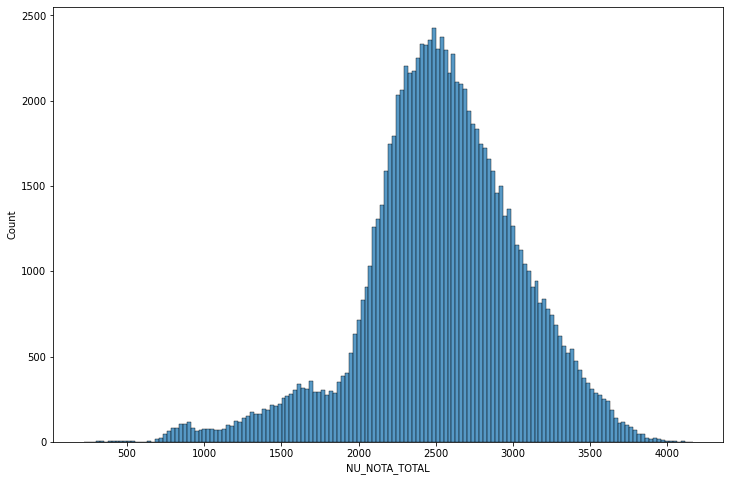

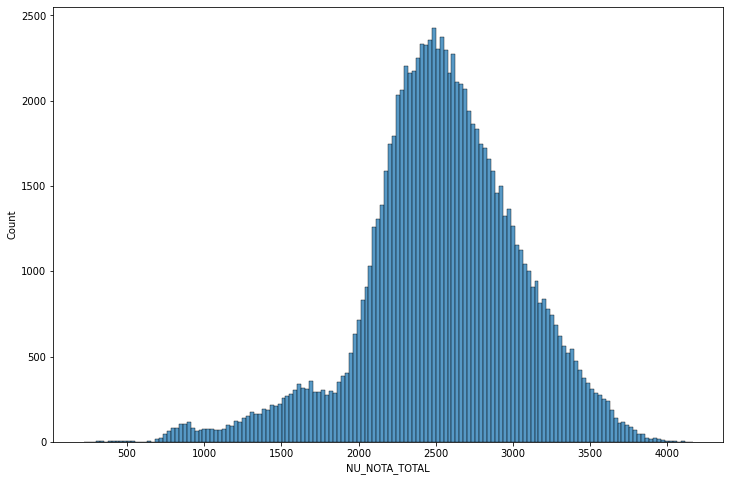

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

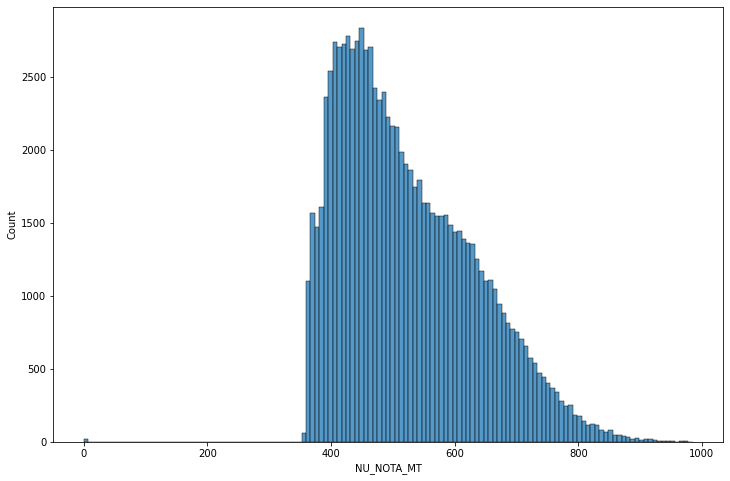

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")

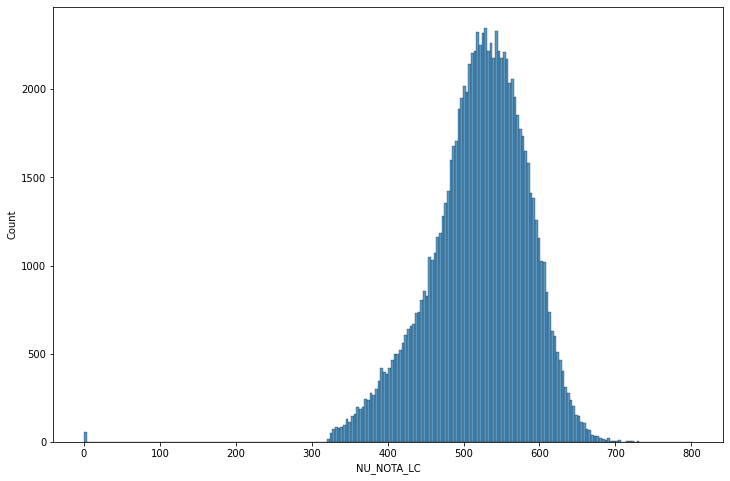

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")

**Desafio 1 -  Plotar as médias, medianas e moda nas notas de LC e MT**

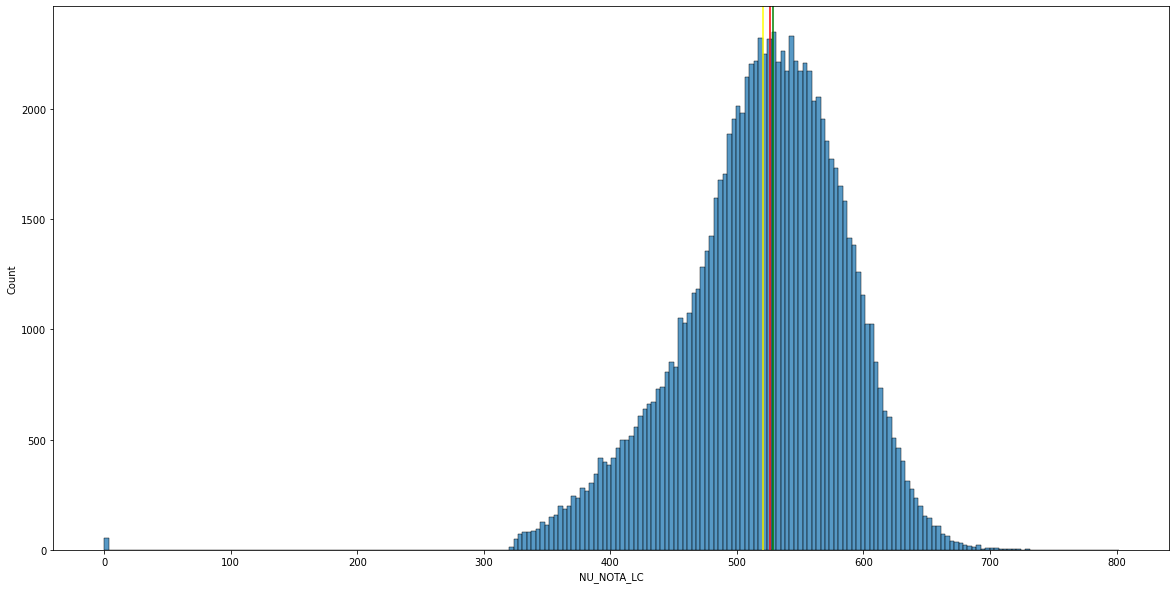

In [ ]:
mediana = dados_sem_notas_zero["NU_NOTA_LC"].median()
moda = dados_sem_notas_zero["NU_NOTA_LC"].mode()
media = dados_sem_notas_zero["NU_NOTA_LC"].mean()

plt.figure(figsize=(20,10))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")

plt.axvline(x = mediana, color = 'red')
plt.axvline(x = moda.values, color = 'green')
plt.axvline(x = media, color = 'yellow')

Text(523.5834291074179, 100, 'Média')

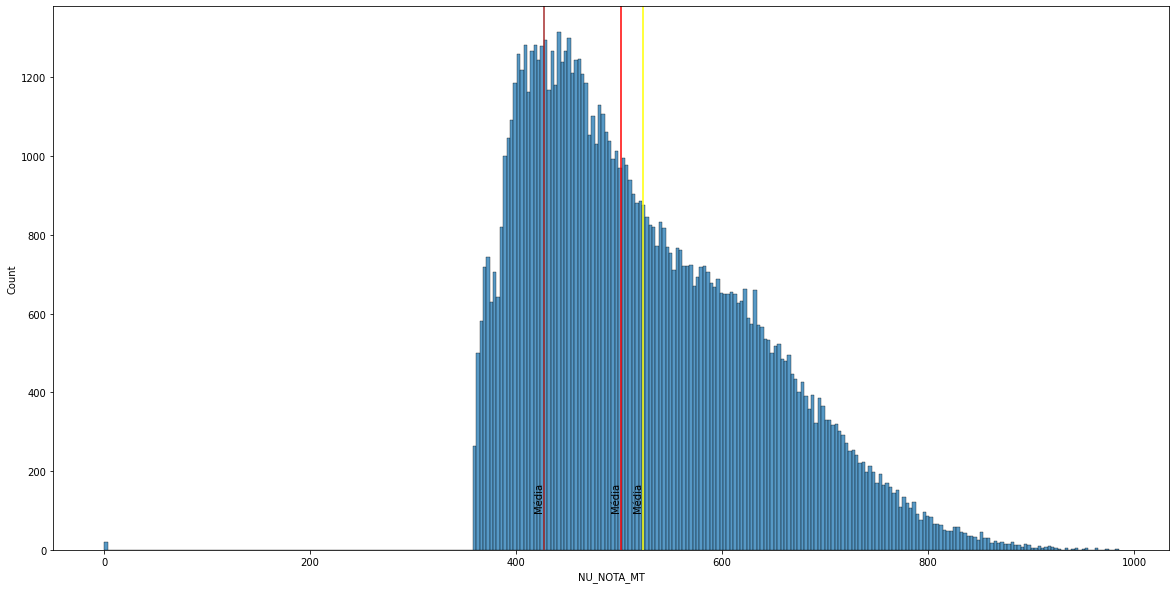

In [ ]:
mediana = dados_sem_notas_zero["NU_NOTA_MT"].median()
moda = dados_sem_notas_zero["NU_NOTA_MT"].mode()
media = dados_sem_notas_zero["NU_NOTA_MT"].mean()

plt.figure(figsize=(20,10))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT", bins=300)

plt.axvline(x = mediana, color = 'red')
plt.text(mediana, 100, 'Média', horizontalalignment='right', rotation=90)
plt.axvline(x = moda.values, color = 'brown')
plt.text(moda, 100, 'Média', horizontalalignment='right', rotation=90)
plt.axvline(x = media, color = 'yellow')
plt.text(media, 100, 'Média', horizontalalignment='right', rotation=90)

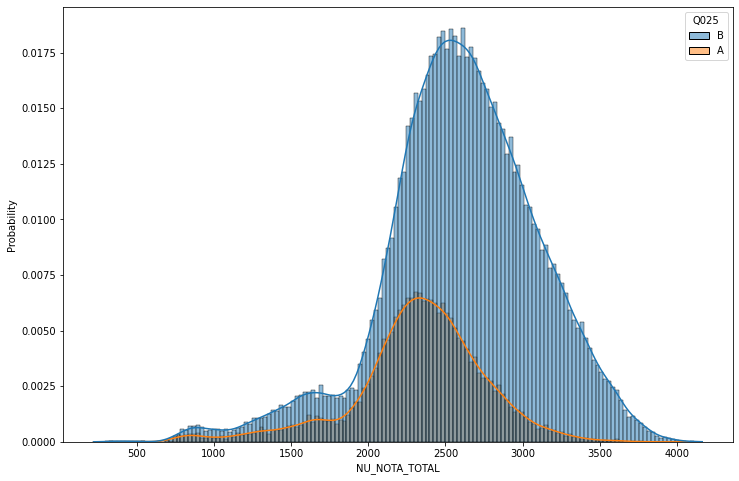

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

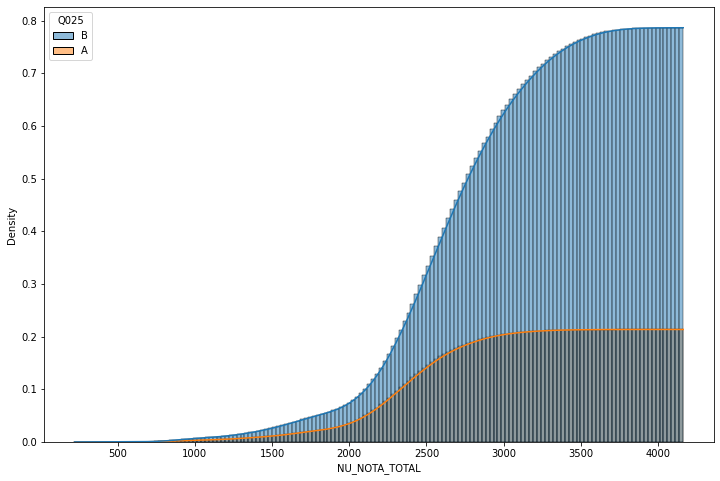

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

(-50.0, 1050.0)

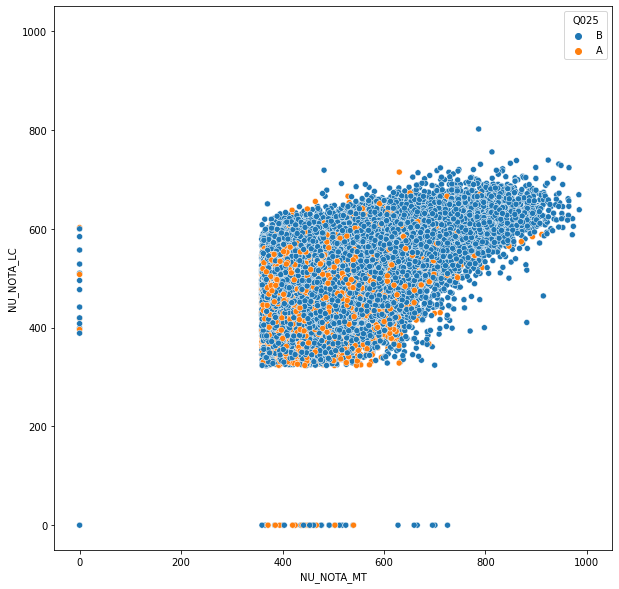

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

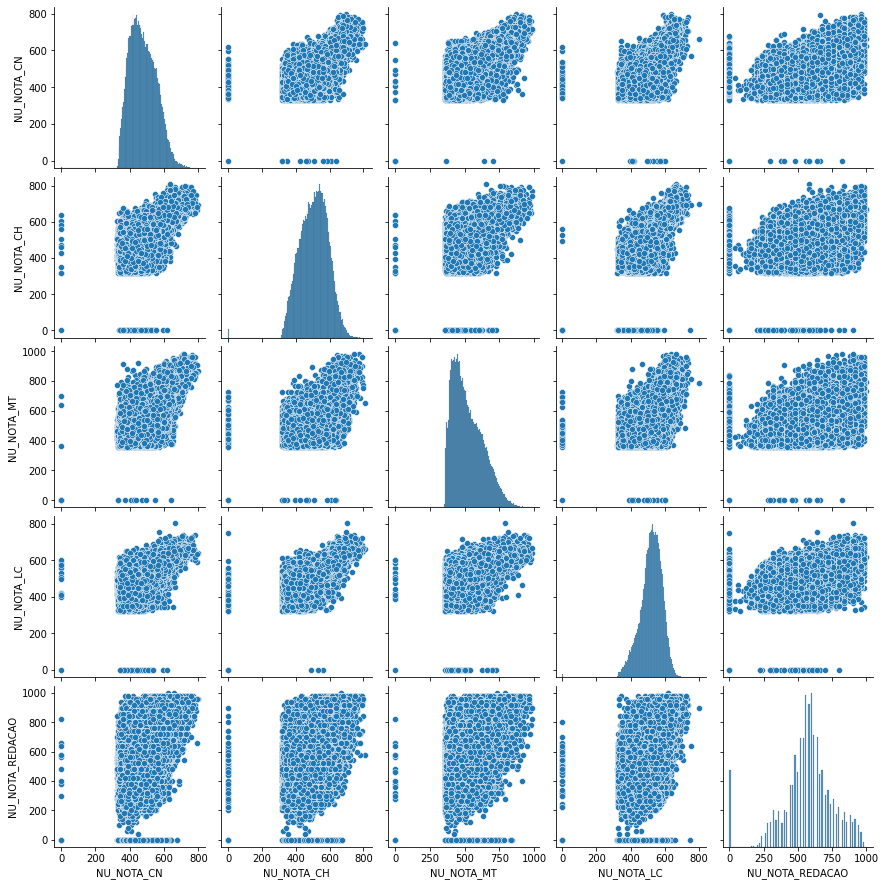

In [ ]:
sns.pairplot(dados_sem_notas_zero[provas])

In [ ]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


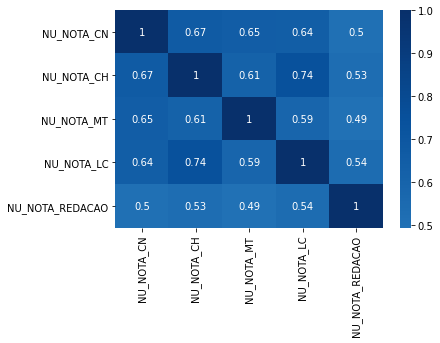

In [ ]:
sns.heatmap(correlacao, cmap = 'Blues', center = 0, annot=True)

**Desafio 2 - Melhorar a visualização da matriz de correlação e analisar mais detalhadamente**

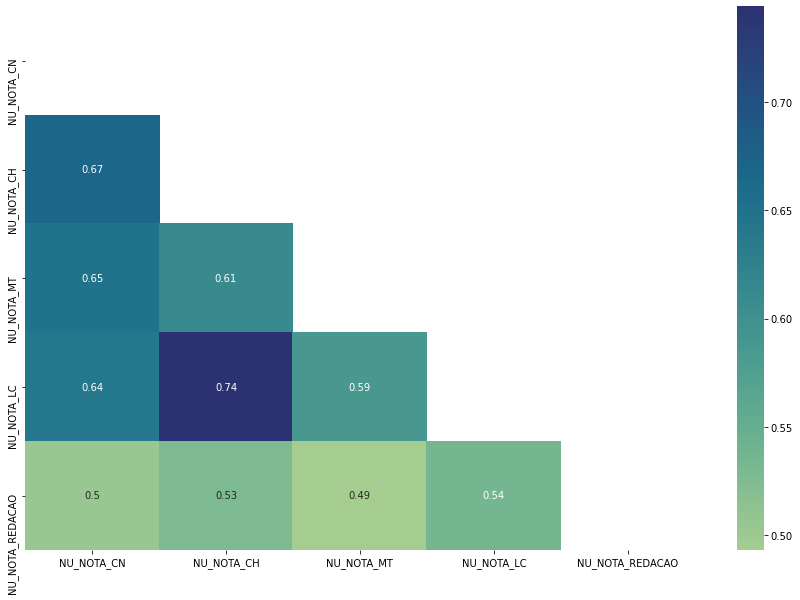

In [ ]:
plt.figure(figsize=(15,10))
cmap = sns.color_palette("crest", as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, cmap = cmap, annot=True)

**Desafio3 -  Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral**

**Desafio 4 - Pensar sobre a correlação entre matemática e Linguagens**

In [ ]:
dados_pb = dados_sem_notas_zero.query('SG_UF_RESIDENCIA == "PB"')
plt.figure(figsize=(20,10))
sns.histplot(data = dados_sem_notas_zero, x = dados_pb['NU_NOTA_TOTAL'], hue='NU_NOTA_TOTAL')